# Base Model With Color Images
This document has the same architecture as 2.0 Final_version_0. The variation for creating this one is to run the model with a different dataset. In this particular case, the dataset contains just five emotions such as happy, sad, angry, fear and disgust, but the images are colored. Another important detail is that images are not restricted just to faces. The reason for this change is because we expect our model be able to recognize a emotion in a picture even when a person is not included. To make clear this point, let's include an example. Commonly, in social media people post pictures of landscape, food, book covers or just quotes, and these diverse images represent a feeling. The model will be trained to recognize a picture and assigned an emotion without taking in account what it contains, which will make it more realistic and unlimited.

The dataset is divided in 4,001 images for the training set and 947 for the test set for the five emotions. Something essential that should be mention is that due to structure of Convolutional Neural Network, in the input layer should specify if the images are color or gray scale. For this particular reason, it is not possible to include the previous dataset with the new one to increase the number of images and as a result the model accuracy. Instead in the future versions, in the ImageDataGenerator another transformation will be included to augment the dataset that will be used for the training step.

The tabel of content is as follow:
   #### 3.1   Packages and Libraries
   #### 3.2   Initialize the Convolutional Neural Network
   #### 3.3   Convolution
   #### 3.4   Pooling
   #### 3.5   Flattening
   #### 3.6   Full Conection
   #### 3.7   Compiling the Convolutional Neural Network
   #### 3.8   Model Summary
   #### 3.9   Generating More Images
   #### 3.10 Fitting the Convolutional Neural Network

### 3.1   Packages and Libraries

In [1]:
import tensorflow

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

import matplotlib.image as img

from IPython.display import display
from PIL import Image
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from Definitions import Graph_Accuracy_Loss

Populating the interactive namespace from numpy and matplotlib


# 2.2 Exploring Images
In this step, an analysis about the dataset is performed. Looking at the shape and color level. At the same time, plotting images to have an idea of how the dataset look like.

In [8]:
# Exploring shape and color level for some of the images
#in the test set for the happy emotion
images = []
for i in range(10):
    im = img.imread(r"/content/train/Train/Happy/Happy{}.PNG".format(i))
    images.append(im)
    print('image shape', im.shape, 'maximum color level', im.max())

image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 0.92941177
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 0.9254902
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0
image shape (48, 48, 3) maximum color level 1.0


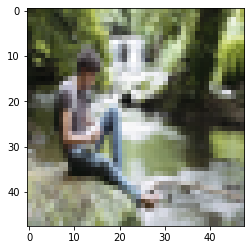

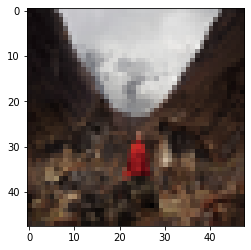

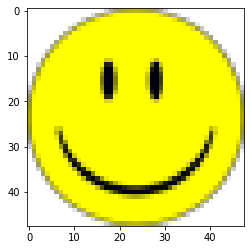

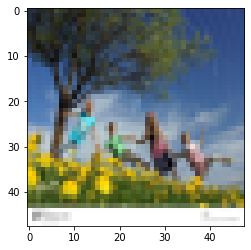

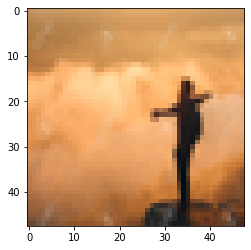

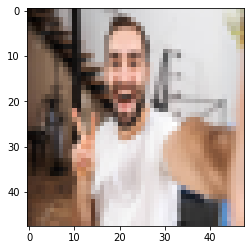

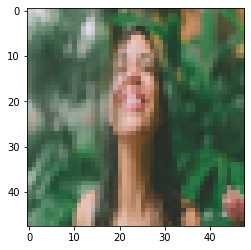

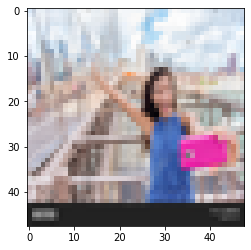

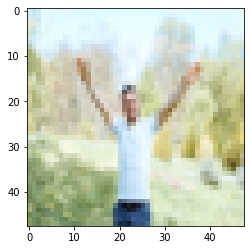

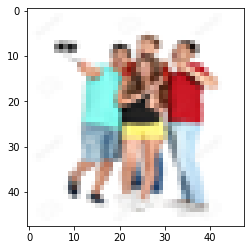

In [9]:
for i in range(10):
    img = mpimg.imread(r"/content/train/Train/Happy/Happy{}.PNG".format(i))
    imgplot = plt.imshow(img)
    plt.show()

### 3.2   Initialize the Convolutional Neural Network

In [10]:
#Initialize the CNN
classifier = Sequential()

### 3.3   Convolution

In [11]:
#step1 - Convolution
#the parameter 3 after 48, 48 means that images
#are coloful
classifier.add(Convolution2D(32, 3 ,3, 
                             input_shape = (48, 48, 3), 
                             activation = 'relu'))

### 3.4   Pooling

In [12]:
#Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

### 3.5   Flattening

In [13]:
#Step 3 - Flattening
classifier.add(Flatten())

### 3.6   Full Conection

In [14]:
#Step 4 - Full Connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(5, activation='softmax'))

### 3.7   Compiling the Convolutional Neural Network

In [15]:
#Compiling the CNN
classifier.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

### 3.8   Model Summary

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 263,813
Trainable params: 263,813
Non-trainable params: 0
_________________________________________________________________


The number of parameters are more compared with the model base for gray scale dataset

### 3.9   Generating More Images

In [18]:
#Part 2 - Fitting the CNN to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    '/content/train/Train',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

test_set = test_datagen.flow_from_directory(
    '/content/train/Test',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical')

Found 4001 images belonging to 5 classes.
Found 947 images belonging to 5 classes.


### 3.10 Fitting the Convolutional Neural Network

In [19]:
from IPython.display import display
from PIL import Image

history = classifier.fit(
    training_set,
    epochs=60,
    validation_data=test_set,
    verbose=1)

Epoch 1/60
 45/126 [=========>....................] - ETA: 3s - loss: 1.5654 - accuracy: 0.2757

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


126/126 [==============================] - 7s 50ms/step - loss: 1.5191 - accuracy: 0.3164 - val_loss: 1.3908 - val_accuracy: 0.4013
Epoch 2/60
126/126 [==============================] - 6s 49ms/step - loss: 1.4245 - accuracy: 0.3859 - val_loss: 1.3997 - val_accuracy: 0.3675
Epoch 3/60
126/126 [==============================] - 6s 47ms/step - loss: 1.3820 - accuracy: 0.4214 - val_loss: 1.3759 - val_accuracy: 0.3812
Epoch 4/60
126/126 [==============================] - 6s 47ms/step - loss: 1.3562 - accuracy: 0.4269 - val_loss: 1.3540 - val_accuracy: 0.4076
Epoch 5/60
126/126 [==============================] - 6s 49ms/step - loss: 1.3301 - accuracy: 0.4449 - val_loss: 1.3352 - val_accuracy: 0.4287
Epoch 6/60
126/126 [==============================] - 6s 47ms/step - loss: 1.3053 - accuracy: 0.4606 - val_loss: 1.3026 - val_accuracy: 0.4477
Epoch 7/60
126/126 [==============================] - 6s 47ms/step - loss: 1.2812 - accuracy: 0.4716 - val_loss: 1.3366 - val_accuracy: 0.4319
Epoch 8/60

At the end of the 60th epoch the accuracy is 0.861 and loss is 0.408

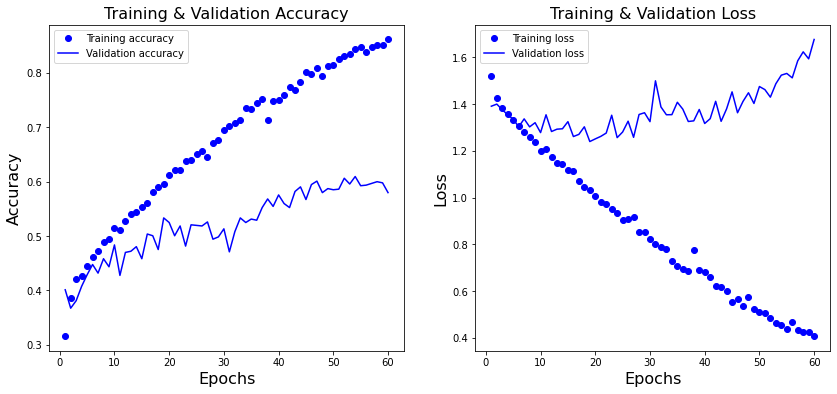

In [20]:
Graph_Accuracy_Loss(history)